In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:

# Definiere Team A
teamA_strength = int(input("Wähle eine Spielstärke(1-10) für Team A: "))             # Spielstärke
teamA_risk = float(input("Wähle eine Risikobereitschaft(0.0-1.0) für Team A: "))     # Risiko

# Definiere Team B
teamB_strength = int(input("Wähle eine Spielstärke(1-10) für Team B: "))             # Spielstärke
teamB_risk = float(input("Wähle eine Risikobereitschaft(0.0-1.0) für Team B: "))     # Risiko 0.0=halbes Risiko, 1.0=100% Risiko

teamA_wins = 0
teamB_wins = 0

results = []

for i in range(1000):      # Anzahl der simulierten Spiele
    teamA_score = 0
    teamB_score = 0
                            # Simuliert Punkte anhand Stärke & Risiko
    while True:
        teamA_prob = (teamA_strength * (1 + teamA_risk)) / (teamA_strength * (1 + teamA_risk) + teamB_strength * (1 - teamB_risk))
        teamA_successes = np.random.binomial(1, teamA_prob)
        teamB_successes = 1 - teamA_successes
        teamA_score += teamA_successes
        teamB_score += teamB_successes

        # Gewinn Ermittlung
        if teamA_score >= 21 and teamA_score - teamB_score >= 2:
            teamA_wins += 1
            results.append((i+1, "Team A", teamA_score, teamB_score))
            break
        elif teamB_score >= 21 and teamB_score - teamA_score >= 2:
            teamB_wins += 1
            results.append((i+1, "Team B", teamA_score, teamB_score))
            break



# Ausgabe als DataFrame als Variable
df = pd.DataFrame(results, columns=["spiel", "gewinner", "team_A_pkt", "team_B_pkt"])
df


,spiel,gewinner,team_A_pkt,team_B_pkt
0,1,Team A,21,14
1,2,Team A,21,11
2,3,Team A,21,5
3,4,Team A,21,7
4,5,Team A,21,6
...,...,...,...,...
995,996,Team A,21,5
996,997,Team A,21,10
997,998,Team A,21,6
998,999,Team A,21,5


In [32]:
# Wiedergabe der Team-Parameter
print("Team A Str. {teamA_strength}")
print("Team A Risk. {teamA_risk}")
print("Team B Str. {teamB_strength}")
print("Team B Risk. {teamB_risk}")

Team A Str. 2
Team A Risk. 0.1
Team B Str. 1
Team B Risk. 0.1


In [33]:
# Export Begegnung_1000_6-0.5:9-0.0.csv Datei (_1000_6-0.5!9-0.0 = Berechnungsparameter (Durchläufe_TeamA Stärke-Risiko!TeamB Stärke-Risiko))
df.to_csv("Begegnungen_1000_1-0.0!1-0.0.csv", sep= ";")
print(df.to_csv)

<bound method NDFrame.to_csv of      spiel gewinner  team_A_pkt  team_B_pkt
0        1   Team A          21          14
1        2   Team A          21          11
2        3   Team A          21           5
3        4   Team A          21           7
4        5   Team A          21           6
..     ...      ...         ...         ...
995    996   Team A          21           5
996    997   Team A          21          10
997    998   Team A          21           6
998    999   Team A          21           5
999   1000   Team A          21          13

[1000 rows x 4 columns]>


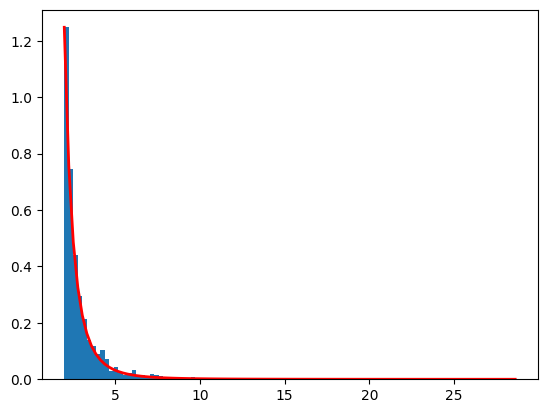

In [44]:


a,m = 3., 2.  # shape and mode
s = (np.random.pareto(a, 1000) + 1) * m
# Zeigen Sie das Histogramm der Stichproben zusammen mit der Wahrscheinlichkeitsdichtefunktion an:

import matplotlib.pyplot as plt
count, bins, _ = plt.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()